In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
SEED = int(time.time())

import sys
sys.path.append('..')

from os.path import join
from datetime import datetime

DATAFOLDER = join('..', 'data')

# Load data and get chunks

In [2]:
data = pd.read_csv(join(DATAFOLDER, 'matches-Brazil.csv'))
data.head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds
0,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Atletico-MG,CSA,4.0,0.0,TEAM1,1.41,7.98,4.31
1,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Chapecoense-SC,Palmeiras,1.0,2.0,TEAM2,5.92,1.63,3.51
2,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559523600,1559529000,Internacional,Avai,2.0,0.0,TEAM1,1.43,8.22,4.15
3,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559512800,1559518200,Athletico-PR,Fluminense,3.0,0.0,TEAM1,1.64,5.39,3.77
4,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,1559512800,1559518200,Ceara,Santos,0.0,1.0,TEAM2,2.69,2.65,3.16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 13 columns):
league                6412 non-null object
area                  6412 non-null object
retrieved_from_url    6412 non-null object
start_time            6412 non-null int64
end_time              6412 non-null int64
team1                 6412 non-null object
team2                 6412 non-null object
team1_score           6411 non-null float64
team2_score           6411 non-null float64
outcome               6412 non-null object
team1_odds            6412 non-null object
team2_odds            6412 non-null object
draw_odds             6412 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 651.3+ KB


Check for NaN entries

In [4]:
data_dropped = data.dropna()
data_dropped.shape

(6411, 13)

Check for duplicates

In [5]:
data_dropped = data_dropped.drop(data_dropped.loc[data_dropped.duplicated()].index)
data_dropped.shape

(6031, 13)

# UTC data to readable data

In [6]:
def utc2time(d):
    return datetime.utcfromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
data.start_time = data_dropped.start_time.apply(utc2time)
data.end_time = data_dropped.end_time.apply(utc2time)

### Sort data

In [8]:
data.sort_values(by='start_time', inplace=True)
data.head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds
6031,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Sao Caetano,Vitoria,1.0,0.0,TEAM1,1.5,6.17,3.48
6030,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Figueirense,Internacional,1.0,0.0,TEAM1,2.1,3.15,3.17
6029,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Botafogo RJ,Goias,1.0,4.0,TEAM2,1.9,3.64,3.2
6028,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Palmeiras,Atletico-MG,0.0,0.0,DRAW,1.95,3.6,3.25
6027,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Cruzeiro,Juventude,2.0,1.0,TEAM1,1.33,-,4.18


In [9]:
idx = data['start_time'] < '2018'
data_until2018 = data.loc[idx]
data_from2018 = data.drop(data_until2018.index)

In [10]:
data_from2018.shape

(830, 13)

In [11]:
data_until2018.shape

(5582, 13)

In [12]:
data.shape

(6412, 13)

# Overall data analyses

Let us take a look how many teams are in this database

In [13]:
teams1 = data_from2018['team1'].unique()
teams2 = data_from2018['team2'].unique()
all_teams = np.append(teams1, teams2)
all_teams

array(['Cruzeiro', 'Vitoria', 'Santos', 'America MG', 'Vasco',
       'Internacional', 'Corinthians', 'Athletico-PR', 'Sao Paulo',
       'Botafogo RJ', 'Bahia', 'Flamengo RJ', 'Parana', 'Atletico-MG',
       'Ceara', 'Palmeiras', 'Fluminense', 'Chapecoense-SC', 'Gremio',
       'Sport Recife', 'CSA', 'Avai', 'Goias', 'Fortaleza', 'Barueri',
       'Atletico GO', 'Guarani', 'Gremio', 'Flamengo RJ', 'Ceara',
       'Sport Recife', 'Atletico-MG', 'Bahia', 'Fluminense',
       'Chapecoense-SC', 'Parana', 'Palmeiras', 'Santos', 'America MG',
       'Corinthians', 'Vitoria', 'Sao Paulo', 'Internacional', 'Cruzeiro',
       'Vasco', 'Athletico-PR', 'Botafogo RJ', 'Avai', 'CSA', 'Fortaleza',
       'Goias', 'Guarani', 'Atletico GO', 'Barueri'], dtype=object)

In [14]:
all_teams = np.unique(all_teams)
all_teams

array(['America MG', 'Athletico-PR', 'Atletico GO', 'Atletico-MG', 'Avai',
       'Bahia', 'Barueri', 'Botafogo RJ', 'CSA', 'Ceara',
       'Chapecoense-SC', 'Corinthians', 'Cruzeiro', 'Flamengo RJ',
       'Fluminense', 'Fortaleza', 'Goias', 'Gremio', 'Guarani',
       'Internacional', 'Palmeiras', 'Parana', 'Santos', 'Sao Paulo',
       'Sport Recife', 'Vasco', 'Vitoria'], dtype=object)

In [15]:
all_teams.shape

(27,)

There are 24 teams that participate in league up to 2018. Let's take a look on:
- How many matches which teams has been participated.

In [16]:
def set_year(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return date.year

In [17]:
data_until2018['year'] = data_until2018['start_time'].apply(set_year)

/home/navar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_team_by_year = data_until2018.groupby(by=['year', 'team1']).team1.count()

In [19]:
data_team_by_year.head()

year  team1       
2004  Athletico-PR    23
      Atletico-MG     22
      Botafogo RJ     23
      Corinthians     23
      Coritiba        23
Name: team1, dtype: int64

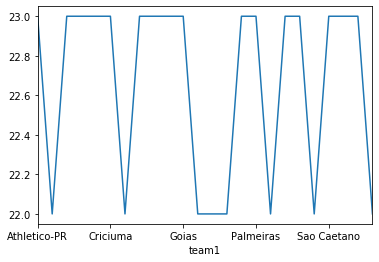

In [20]:
data_team_by_year.loc[2004].plot()

In a give year all team attent to the same number o matches.

In [21]:
gb_year = data_until2018.groupby(by='year')
gb_year.get_group(2010).head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds,year
3518,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Palmeiras,Vitoria,1.0,0.0,TEAM1,1.6,5.5,3.7,2010
3517,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Botafogo RJ,Santos,3.0,3.0,DRAW,2.36,2.79,3.34,2010
3516,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 00:30:00,2010-05-09 02:00:00,Atletico GO,Gremio,0.0,0.0,DRAW,2.23,3.06,3.32,2010
3515,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 22:00:00,2010-05-09 23:30:00,Internacional,Cruzeiro,1.0,2.0,TEAM2,2.05,3.38,3.37,2010
3514,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2010-05-09 22:00:00,2010-05-09 23:30:00,Flamengo RJ,Sao Paulo,1.0,1.0,DRAW,2.13,3.22,3.34,2010


In [22]:
count_outcome_by_year = gb_year.outcome.value_counts().unstack()
count_outcome_by_year

outcome,DRAW,TEAM1,TEAM2
year,,,
2004,139,283,122
2005,102,230,121
2006,96,191,92
2007,90,190,97
2008,96,208,76
2009,102,195,83
2010,118,179,83
2011,105,184,91
2012,105,183,92


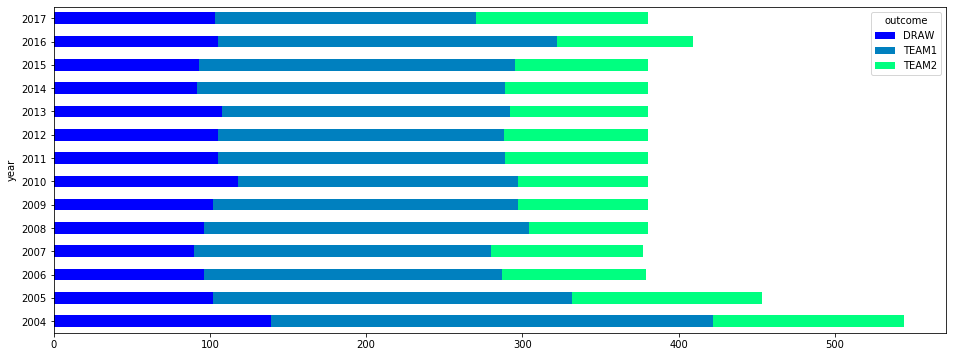

In [23]:
count_outcome_by_year.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

We can see that the number of matches that resulted in `DRAW` tend to be the same over a 12 year period. 

In [24]:
count_outcome_by_year.describe()

outcome,DRAW,TEAM1,TEAM2
count,14.000000,14.000000,14.000000
mean,103.857143,200.714286,94.142857
std,12.519874,28.669009,13.966207
min,90.000000,167.000000,76.000000
25%,96.000000,184.000000,85.500000
50%,102.500000,193.000000,91.000000
75%,105.000000,206.500000,95.750000
max,139.000000,283.000000,122.000000


In [25]:
count_outcome_by_year.describe()

outcome,DRAW,TEAM1,TEAM2
count,14.000000,14.000000,14.000000
mean,103.857143,200.714286,94.142857
std,12.519874,28.669009,13.966207
min,90.000000,167.000000,76.000000
25%,96.000000,184.000000,85.500000
50%,102.500000,193.000000,91.000000
75%,105.000000,206.500000,95.750000
max,139.000000,283.000000,122.000000


In [26]:
def matches_percentage(row):
    return row / row.sum()

In [27]:
for idx, row in count_outcome_by_year.iterrows():
    count_outcome_by_year.loc[idx] = matches_percentage(row)

In [28]:
count_outcome_by_year.describe()

outcome,DRAW,TEAM1,TEAM2
count,14.000000,14.000000,14.000000
mean,0.261125,0.502678,0.236197
std,0.021832,0.028320,0.023456
min,0.225166,0.439474,0.200000
25%,0.246711,0.484211,0.219737
50%,0.256119,0.505853,0.235526
75%,0.275000,0.519771,0.242584
max,0.310526,0.547368,0.289474


About **26%** of matches resulted in `DRAW`

But what happened in **2010**?

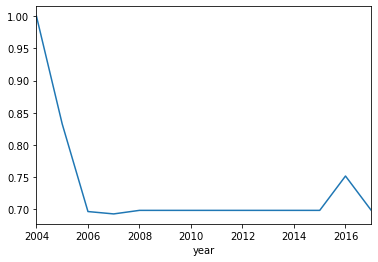

In [29]:
(gb_year.outcome.count() / gb_year.outcome.count().max()).plot()

In 2004 there were more about **30%** more matches than in other years. Why is that? Is that an outlier? Let us to investigate:
- How many teams are participating each season
- How many matches teams have attend in average.
- Compare everything agains 2010's data. (There were some duplicates. fixed at the beggining)

In [30]:
gb_year.team1.count()

year
2004    544
2005    453
2006    379
2007    377
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    409
2017    380
Name: team1, dtype: int64

In [31]:
number_teams = []
number_of_matches = []
average_matches = []
year = []

for idx, row in gb_year.team1.unique().items():
    average_matches.append(gb_year.team1.count()[idx] / len(row))
    number_teams.append(len(row))
    number_of_matches.append(gb_year.team1.count()[idx])
    year.append(idx)
    
teams = {'number_of_matches': number_of_matches,
         'number_teams': number_teams,
         'average_matches': average_matches}

In [32]:
df_teams = pd.DataFrame(data=teams, index=year)
df_teams

,number_of_matches,number_teams,average_matches
2004,544,24,22.666667
2005,453,22,20.590909
2006,379,20,18.950000
2007,377,20,18.850000
2008,380,20,19.000000
2009,380,20,19.000000
2010,380,20,19.000000
2011,380,20,19.000000
2012,380,20,19.000000
2013,380,20,19.000000


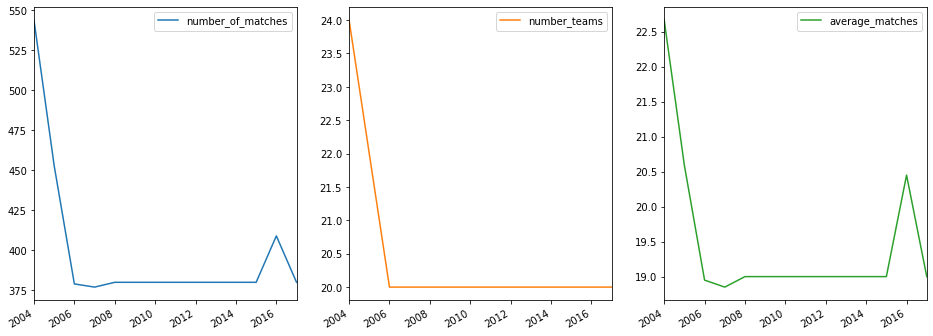

In [33]:
df_teams.plot(subplots=True, layout=(1,3), figsize=(16,6))
plt.show()

There were more team participating the league back in 2004.

# Teams statistics

In [34]:
gb_team1 = data_until2018.groupby(by='team1')

In [35]:
gb_team1.year.value_counts().head()

team1         year
America MG    2016    21
              2011    19
America RN    2007    19
Athletico-PR  2004    23
              2015    21
Name: year, dtype: int64

## How the results are distributed

In [36]:
outcome_by_team = gb_team1.outcome.value_counts().unstack()

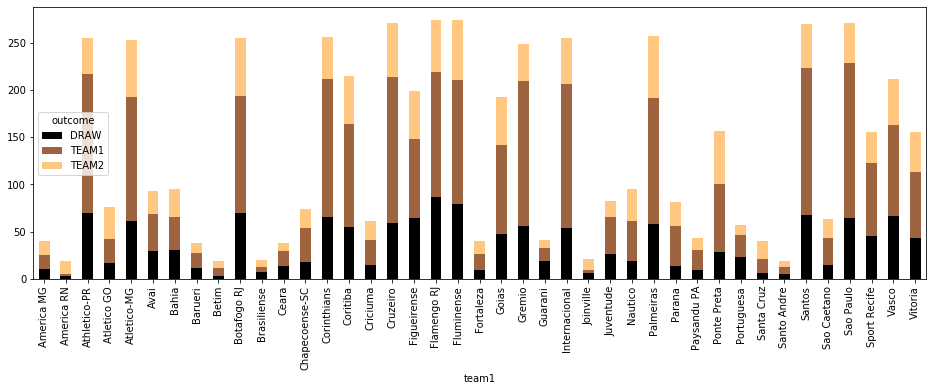

In [37]:
outcome_by_team.plot(kind='bar', stacked=True, figsize=[16,5], colormap='copper')
plt.show()

Let us answer:
- How many matches each team has player and how they are distributed over the period.

In [46]:
outcome_by_team['matches'] = outcome_by_team.sum(axis=1)
outcome_by_team.head()

outcome,DRAW,TEAM1,TEAM2,matches
team1,,,,
America MG,11,14,15,80
America RN,3,2,14,38
Athletico-PR,70,147,38,510
Atletico GO,17,25,34,152
Atletico-MG,61,132,60,506


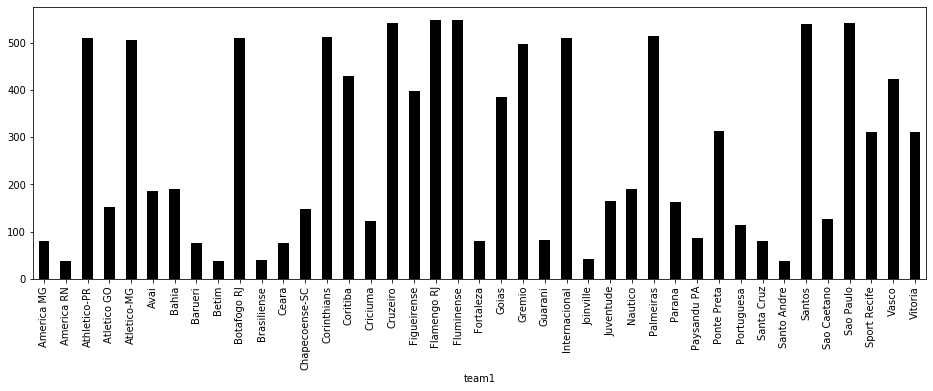

In [47]:
outcome_by_team['matches'].plot(kind='bar', stacked=True, figsize=[16,5], colormap='copper')
plt.show()

In [39]:
gb_outcome = data_until2018.groupby(by=['outcome', 'year'])
gb_outcome

In [40]:
gb_outcome['team1']

In [41]:
gb_team1 = data_until2018.groupby(by='team1')
gb_year.get_group('Palmeiras').head()

KeyError: 'Palmeiras'

In [ ]:
data_from2018.groupby('start_time')

In [ ]:
data_from2018.groupby('start_time')